In [1]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

In [3]:
# Specify the source image
source = 'https://ultralytics.com/images/bus.jpg'

# Make predictions
results = model.predict(source, save=True, imgsz=320, conf=0.5)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/bus.jpg: 320x256 3 persons, 1 bus, 40.6ms
Speed: 1.2ms preprocess, 40.6ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 256)
Results saved to runs/detect/predict7


In [4]:
# # Process results list
# for result in results:
#     boxes = result.boxes  # Boxes object for bounding box outputs
#     masks = result.masks  # Masks object for segmentation masks outputs
#     keypoints = result.keypoints  # Keypoints object for pose outputs
#     probs = result.probs  # Probs object for classification outputs

In [5]:
# Extract bounding box dimensions
boxes = results[0].boxes.xywh.cpu()
for box in boxes:
    x, y, w, h = box
    print(f"Width of Box: {w}, Height of Box: {h}")

Width of Box: 187.62994384765625, Height of Box: 515.302001953125
Width of Box: 787.837158203125, Height of Box: 527.8720092773438
Width of Box: 128.616455078125, Height of Box: 451.0984191894531
Width of Box: 140.34326171875, Height of Box: 498.5552062988281


## Print saved image

In [6]:
img_path = 'runs/detect/predict/bus.jpg'

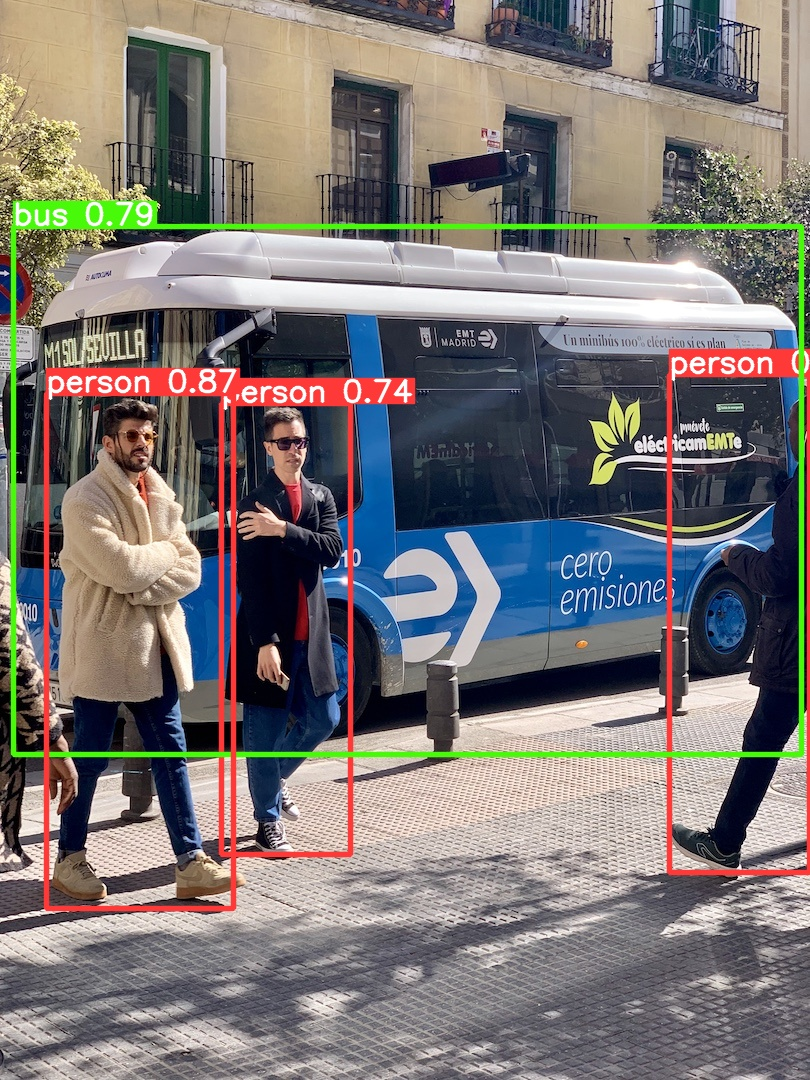

In [7]:
# PIL
Image.open(img_path)

## Print reults

In [8]:
# The visualize result in BGR-order numpy array
bgr_array = results[0].plot()
# Convert BGR to RGB
rgb_array = bgr_array[:, :, ::-1]

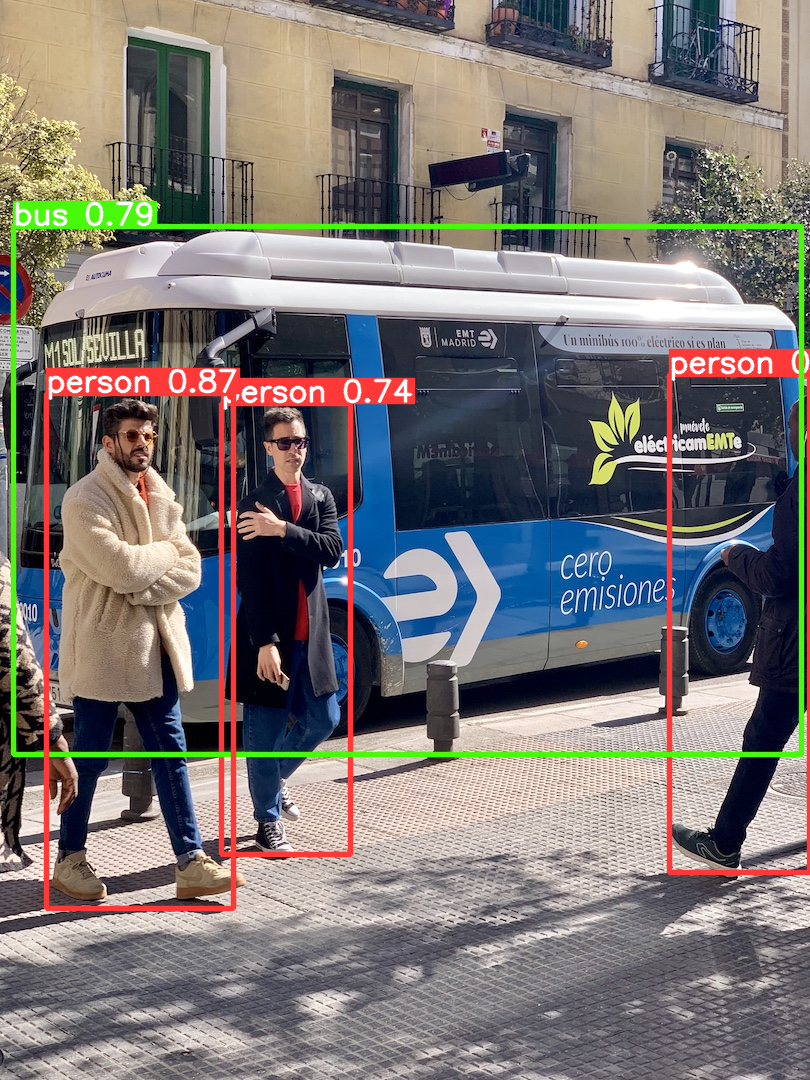

In [9]:
# Print image
Image.fromarray(rgb_array)

## Local image

In [10]:
# Plot results image
def printYOLO(results):
    # Initialize a figure for plotting
    plt.figure(figsize=(10, 10))

    # Process results list
    for i, result in enumerate(results):
        # assuming plot() method returns a numpy array in BGR format
        bgr_array = result.plot()

        # Convert BGR to RGB
        rgb_array = bgr_array[:, :, ::-1]

        # Convert numpy array to PIL Image
        img = Image.fromarray(rgb_array)

        # Add a subplot for each image
        ax = plt.subplot(len(results), 1, i + 1)
        ax.imshow(img)
        ax.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

In [11]:
img_path1 = '../_data/resource/id_swe.jpg'
img_path2 = '../_data/resource/note_ticket_class.jpg'

In [12]:
# Make predictions
results = model.predict([img_path1, img_path2])


0: 640x640 3 persons, 1 book, 1: 640x640 1 book, 275.5ms
Speed: 19.4ms preprocess, 137.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


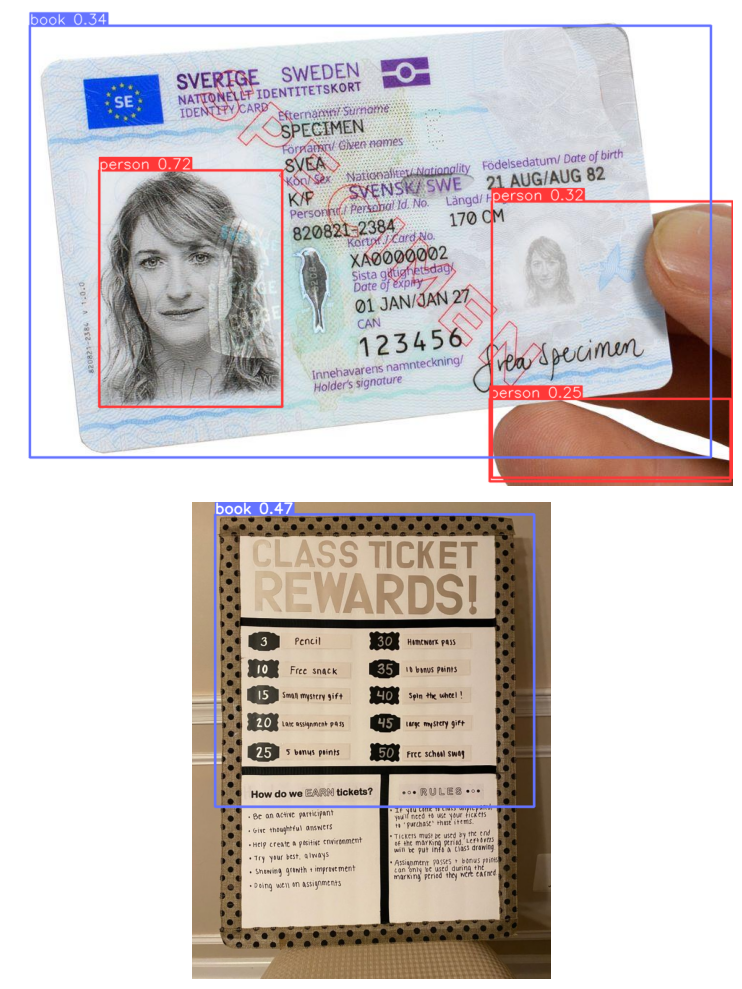

In [13]:
printYOLO(results)